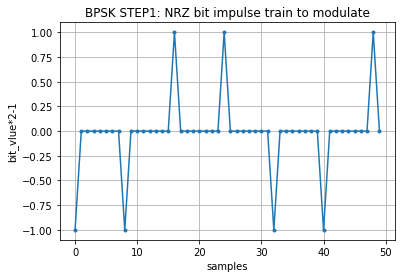

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal



num_bits = 256
#Because Bpsk we have 1 bit per symbol
num_symbols = 1*num_bits
#To modulate BPSK we just simply use a pulse train for bits for the real Inphase (I) values
#There is no Quadature (Q) imaginary component.  To get the baseband signal we will convolve (multiply in Freq domain)
#The impulse train.  We need only impulses with zero's spaced between.

sym_rate = 1 #Hz of symbols sent per second
sps = 8 #samples per second, our sampling rate = Fs
Fs =  sps

bits = np.random.randint(0, 2, num_bits) # Our data to be transmitted, 1's and 0's

x = np.array([])
for bit in bits:
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 # set the first value to either a 1 or -1
    x = np.concatenate((x, pulse)) # add the 8 samples to the signal
plt.figure(0)
plt.title("BPSK STEP1: NRZ bit impulse train to modulate")
plt.xlabel("samples")
plt.ylabel("bit_vlue*2-1")
plt.plot(x[0:50], '.-')
plt.grid(True)
plt.show()


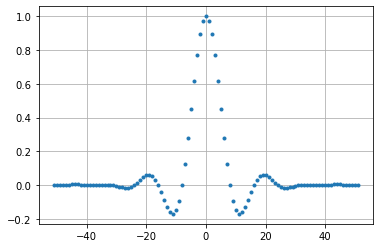

In [72]:
# Create our raised-cosine filter
num_taps = 101
beta = 0.35
#Ts is the symbol period which is the period (time interval) between symbols an thus 1/Fs
Ts = sps #1/Fs
#Ts = sps # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8
t = np.arange(-51, 52) # remember it's not inclusive of final number
h = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)
plt.figure(1)
plt.plot(t, h, '.')
plt.grid(True)
plt.show()

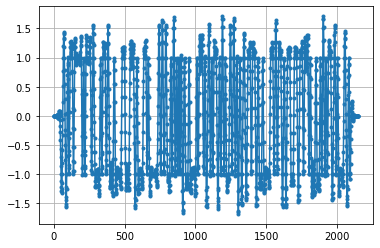

In [73]:
# Filter our signal, in order to apply the pulse shaping
x_shaped = np.convolve(x, h)
plt.figure(2)
plt.plot(x_shaped, '.-')
#for i in range(num_symbols):
#    plt.plot([i*sps+num_taps//2+1,i*sps+num_taps//2+1], [min(x_shaped), max(x_shaped)])
plt.grid(True)
plt.show()

64


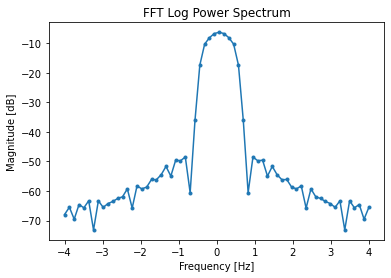

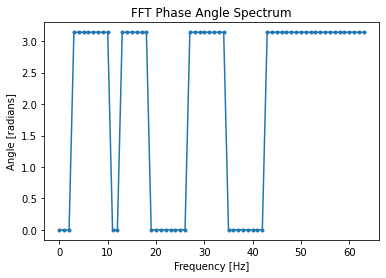

In [74]:
#Plot FFT of our BPSK Signal
#Plot real and Imaginary

FFT_size = 64 #lenght of time domain samples to equate in the fft
FFT_averaging = 2 #number of individual fft's taken and averaged together to smooth it

# before plotting FFT of anything window the time domain sigal (haming,hanning, blackman, kaiser)
# otherwise high freq components show up since fft wraps first and last time domain symbols so smooth them out
x_windowed = x_shaped[0:FFT_size] * np.hamming(len(x_shaped[0:FFT_size]))
print(len(x_windowed))

#Power Spectral Density takes sample rate Fs to plot power
PSD = np.abs(np.fft.fft(x_windowed)/Fs)**2
PSD_log = 10.0*np.log10(PSD)
#remember fftshift re-orders correctly negative and positive bins for viewing
#S = np.fft.fftshift(np.fft.fft(x_windowed))
PSD_shifted = np.fft.fftshift(PSD_log)
S_mag = PSD_shifted
S_phase = np.angle(x_shaped[0:FFT_size])

#To get frequency axis correct we set the frequency array based on our SR and filter so samplerate*(beta+1)?
#Since baseband we know centered around middle
f_center = 0 #Hz (center frequency of signal)
f = np.linspace(f_center-Fs/2.0,f_center+Fs/2.0, FFT_size)

plt.figure()
plt.title("FFT Log Power Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.plot(f,S_mag,'.-')

plt.figure()
plt.title("FFT Phase Angle Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Angle [radians]")
plt.plot(S_phase,'.-')
S_angle = S_phase